2DOF :  2 angles
Circular obstacles that it cannot bump into
1. Calculate config space for these two robots 
2. Make arms rectangular 
3. You can decide length and width of arms
4. 3 spheres obstacles -> you decide diameter and location
5. Calculate configuration space by randomly sampling and see if it collides
    1. Sample every combination 
    2. Get an image  - > (workspace, config_space)
6.  Train from work space to estimate config space
    1. See if shape 


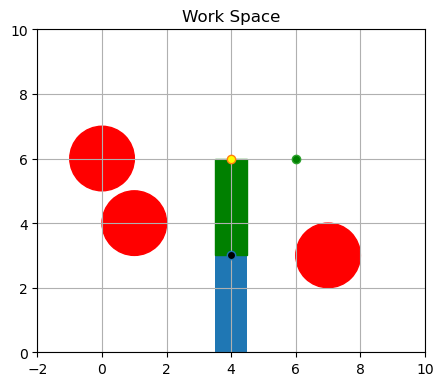

In [1]:
from shapely.geometry import Polygon
import matplotlib.pyplot as plt

robot_arm1 = Polygon([
   (3.5, 0),
    (3.5,3),
   (4.5, 3),
    (4.5,0)
])


robot_arm2 = Polygon([
   (3.5, 3),
    (3.5,6),
    (4.5,6),
    (4.5, 3),
])


rx, ry = robot_arm1.exterior.xy
black = [[4],[3]]
start = [[4],[6]]
goal = [[6],[6]]

fig,ax = plt.subplots(figsize=(5,5))
obstacle_1 = plt.Circle((0,6),1,color='r')
obstacle_2 = plt.Circle((1,4),1,color='r')
obstacle_3 = plt.Circle((7,3),1,color='r')
ax.fill(*robot_arm1.exterior.xy)
ax.fill(*robot_arm2.exterior.xy,color='green')
ax.plot(black[0],black[1],marker="o",markerfacecolor="black")
ax.plot(start[0],start[1],marker="o",markerfacecolor="yellow")
ax.plot(goal[0],goal[1],marker="o",markerfacecolor="green")


ax.set_title("Work Space")
ax.set_xlim([-2,10])
ax.set_ylim([0,10])
ax.set_aspect( 1 )
ax.add_artist(obstacle_1)
ax.add_artist(obstacle_2)
ax.add_artist(obstacle_3)
plt.grid()


In [2]:
# different poositions of first arm:
import math
results = []
len_arm = 3
x_offset = 4
for i in range(181):
    x,y = len_arm * math.cos(math.radians(i)),len_arm * math.sin(math.radians(i))
    results.append([x+x_offset,y])

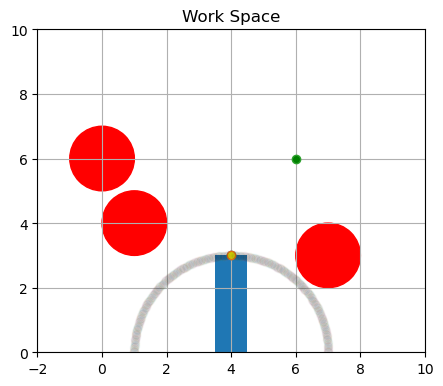

In [8]:

from shapely.geometry import Polygon
import matplotlib.pyplot as plt

robot_arm1 = Polygon([
   (3.5, 0),
    (3.5,3),
   (4.5, 3),
    (4.5,0)
])

rx, ry = robot_arm1.exterior.xy
black = [[4],[3]]
start = [[4],[3]]
goal = [[6],[6]]

fig,ax = plt.subplots(figsize=(5,5))
obstacle_1 = plt.Circle((0,6),1,color='r')
obstacle_2 = plt.Circle((1,4),1,color='r')
obstacle_3 = plt.Circle((7,3),1,color='r')
ax.fill(*robot_arm1.exterior.xy)
ax.plot(black[0],black[1],marker="o",markerfacecolor="black")
ax.plot(start[0],start[1],marker="o",markerfacecolor="yellow")
ax.plot(goal[0],goal[1],marker="o",markerfacecolor="green")
ax.plot()

for pt in results:
    ax.plot(pt[0],pt[1],marker='o',markerfacecolor='black',alpha=.05)


ax.set_title("Work Space")
ax.set_xlim([-2,10])
ax.set_ylim([0,10])
ax.set_aspect( 1 )
ax.add_artist(obstacle_1)
ax.add_artist(obstacle_2)
ax.add_artist(obstacle_3)
plt.grid()


In [10]:
# different poositions of first arm:
import math
results = []
len_arm_1 = 3
len_arm_2 = 3
x_offset = 4
y_offset = 0
for i in range(181):
    arm_1_x,arm_1_y = len_arm_1 * math.cos(math.radians(i)) + x_offset,len_arm_1 * math.sin(math.radians(i)) + y_offset        
    for j in range(181):
        arm_2_x = len_arm_2 * math.cos(math.radians(j)) + arm_1_x
        arm_2_y = len_arm_2 * math.sin(math.radians(j)) + arm_1_y
        results.append([arm_2_x,arm_2_y])


In [35]:
def get_points_discret(x_offset,y_offset,len_q1,len_q2,q1,q2):
    results = []
    for i in q1:
        arm_1_x,arm_1_y = len_q1 * math.cos(math.radians(i)) + x_offset , len_q1 * math.sin(math.radians(i)) + y_offset
        for j in q2:
            arm_2_x,arm_2_y = len_q2 * math.cos(math.radians(j)) + arm_1_x , len_q2 * math.sin(math.radians(j)) + arm_1_y
            results.append((arm_2_x,arm_2_y))
    return results

In [48]:
def get_points_continuous(x_offset,y_offset,len_q1,len_q2,q1,q2):
    results = []
    for i in range(q1[0],q1[1]+1):
        arm_1_x,arm_1_y = len_q1 * math.cos(math.radians(i)) + x_offset , len_q1 * math.sin(math.radians(i)) + y_offset
        for j in range(q2[0],q2[1]+1):
            arm_2_x,arm_2_y = len_q2 * math.cos(math.radians(j)) + arm_1_x , len_q2 * math.sin(math.radians(j)) + arm_1_y
            results.append((arm_2_x,arm_2_y))
    return results

In [61]:
points_c  = set(get_points_continuous(4,0,3,3,[0,180],[0,180]))

In [ ]:
goal = 

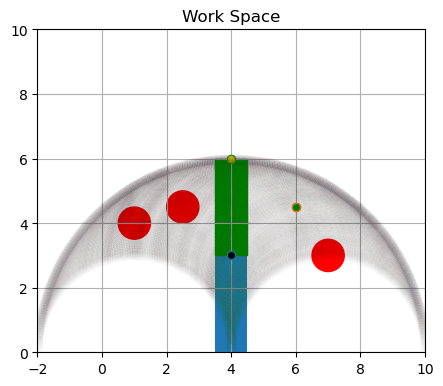

In [68]:
from shapely.geometry import Polygon
import matplotlib.pyplot as plt

robot_arm1 = Polygon([
   (3.5, 0),
    (3.5,3),
   (4.5, 3),
    (4.5,0)
])


robot_arm2 = Polygon([
   (3.5, 3),
    (3.5,6),
    (4.5,6),
    (4.5, 3),
])


rx, ry = robot_arm1.exterior.xy
black = [[4],[3]]
start = [[4],[6]]
goal = [[6],[4.5]]

fig,ax = plt.subplots(figsize=(5,5))
obstacle_1 = plt.Circle((2.5,4.5),.5,color='r')
obstacle_2 = plt.Circle((1,4),.5,color='r')
obstacle_3 = plt.Circle((7,3),.5,color='r')
ax.fill(*robot_arm1.exterior.xy)
ax.fill(*robot_arm2.exterior.xy,color='green')
ax.plot(black[0],black[1],marker="o",markerfacecolor="black")
ax.plot(goal[0],goal[1],marker="o",markerfacecolor="green")
ax.plot(start[0],start[1],marker='o',markerfacecolor='yellow')


for pt in points_c:
    ax.plot(pt[0],pt[1],marker='o',markerfacecolor='grey',alpha=.005)

ax.set_title("Work Space")
ax.set_xlim([-2,10])
ax.set_ylim([0,10])
ax.set_aspect( 1 )
ax.add_artist(obstacle_1)
ax.add_artist(obstacle_2)
ax.add_artist(obstacle_3)
plt.grid()


[]

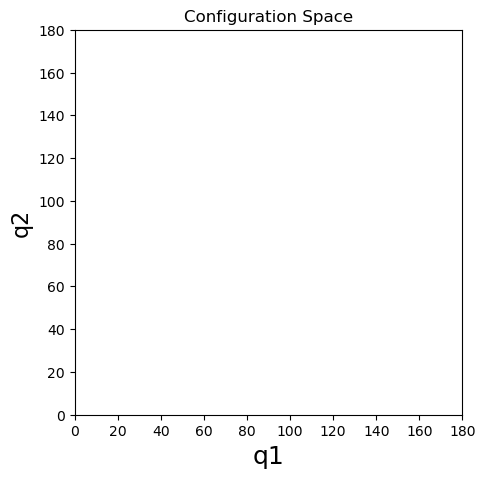

In [70]:
import matplotlib.pyplot as plt


fig,ax = plt.subplots(figsize=(5,5))


ax.set_title("Configuration Space")
ax.set_xlim([0,180])
ax.set_ylim([0,180])
plt.xlabel('q1', fontsize=18)
plt.ylabel('q2', fontsize=16)

plt.plot()
